User choice to select number of layers and neurons

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd

In [ ]:
dataset = pd.read_csv("2000-01.csv")

In [ ]:
dataset.drop(['Referee' , 'Div' , 'Date','Attendance','HHW','AR','AY','HO','AC','HC'] , axis = 1, inplace = True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   HomeTeam  380 non-null    object
 1   AwayTeam  380 non-null    object
 2   FTHG      380 non-null    int64 
 3   FTAG      380 non-null    int64 
 4   FTR       380 non-null    object
 5   HTHG      380 non-null    int64 
 6   HTAG      380 non-null    int64 
 7   HTR       380 non-null    object
 8   HS        380 non-null    int64 
 9   AS        380 non-null    int64 
 10  HST       380 non-null    int64 
 11  AST       380 non-null    int64 
 12  AHW       380 non-null    int64 
 13  HF        380 non-null    int64 
 14  AF        380 non-null    int64 
 15  AO        380 non-null    int64 
 16  HY        380 non-null    int64 
 17  HR        380 non-null    int64 
dtypes: int64(14), object(4)
memory usage: 53.6+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['HomeTeam']= label_encoder.fit_transform(dataset['HomeTeam'])
dataset['AwayTeam']= label_encoder.fit_transform(dataset['AwayTeam'])
dataset['FTR']= label_encoder.fit_transform(dataset['FTR'])
dataset['HTR']= label_encoder.fit_transform(dataset['HTR'])

In [ ]:
X = dataset.drop('FTR',axis = 1).values
Y = dataset['FTR']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(304, 17)
(76, 17)
(304,)
(76,)


In [ ]:
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=3)
Y_test = tf.keras.utils.to_categorical(Y_test, num_classes=3)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
layer = int(input("Enter the number of layers: "))
neu = int(input("Enter the number of neurons in each layer: "))

In [ ]:
model = Sequential()

model.add(Dense(neu, activation='relu', input_dim = 17))
model.add(Dense(layer, input_dim = 17, activation = 'relu'))
model.add(Dense(3,activation='softmax'))

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_split=0.1)

Epoch 1/5
9/9 [==============================] - 1s 18ms/step - loss: 1.0812 - accuracy: 0.4396 - val_loss: 1.0436 - val_accuracy: 0.5484
Epoch 2/5
9/9 [==============================] - 0s 4ms/step - loss: 0.9993 - accuracy: 0.5092 - val_loss: 1.0182 - val_accuracy: 0.4839
Epoch 3/5
9/9 [==============================] - 0s 5ms/step - loss: 0.9558 - accuracy: 0.5201 - val_loss: 0.9431 - val_accuracy: 0.5484
Epoch 4/5
9/9 [==============================] - 0s 5ms/step - loss: 0.8896 - accuracy: 0.5824 - val_loss: 0.9504 - val_accuracy: 0.5161
Epoch 5/5
9/9 [==============================] - 0s 6ms/step - loss: 0.8762 - accuracy: 0.5751 - val_loss: 0.9458 - val_accuracy: 0.4839


BackPropogation

In [ ]:
model3 = Sequential()
model3.add(Dense(304, activation='relu', input_dim = 17))
model3.add(Dense(3,activation='softmax'))

model3.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy',metrics=['accuracy'])

model3.fit(X_train, Y_train, epochs=10, batch_size=32)


Epoch 1/10
10/10 [==============================] - 0s 898us/step - loss: 2.7915 - accuracy: 0.4145
Epoch 2/10
10/10 [==============================] - 0s 2ms/step - loss: 2.3537 - accuracy: 0.4112
Epoch 3/10
10/10 [==============================] - 0s 2ms/step - loss: 1.3011 - accuracy: 0.4704
Epoch 4/10
10/10 [==============================] - 0s 1ms/step - loss: 1.3554 - accuracy: 0.4605
Epoch 5/10
10/10 [==============================] - 0s 2ms/step - loss: 0.8981 - accuracy: 0.6184
Epoch 6/10
10/10 [==============================] - 0s 1ms/step - loss: 0.9349 - accuracy: 0.5658
Epoch 7/10
10/10 [==============================] - 0s 1ms/step - loss: 0.8590 - accuracy: 0.6217
Epoch 8/10
10/10 [==============================] - 0s 2ms/step - loss: 0.7635 - accuracy: 0.6743
Epoch 9/10
10/10 [==============================] - 0s 7ms/step - loss: 0.7159 - accuracy: 0.6842
Epoch 10/10
10/10 [==============================] - 0s 2ms/step - loss: 0.8127 - accuracy: 0.6711


In [ ]:
import matplotlib.pyplot as plt

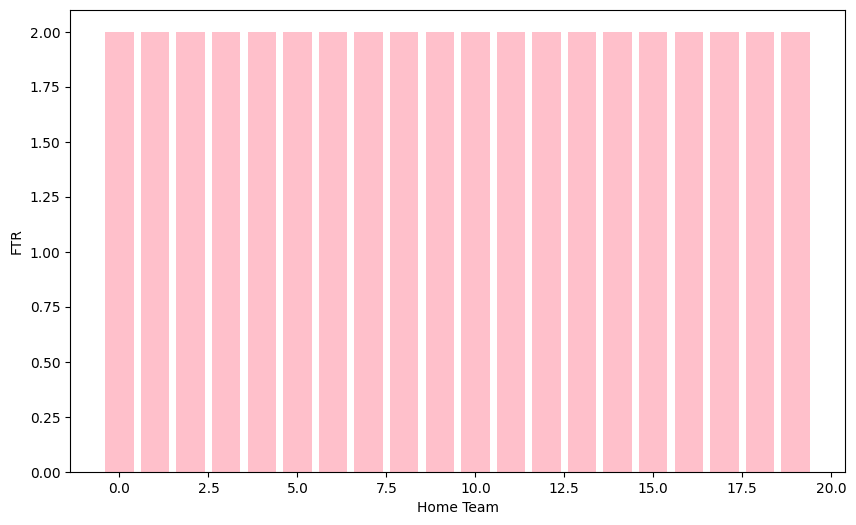

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar (dataset['HomeTeam'], dataset['FTR'], color = 'pink'  )
plt.xlabel('Home Team')
plt.ylabel('FTR')
plt.show()

In [ ]:
cor_mat = dataset.corr()

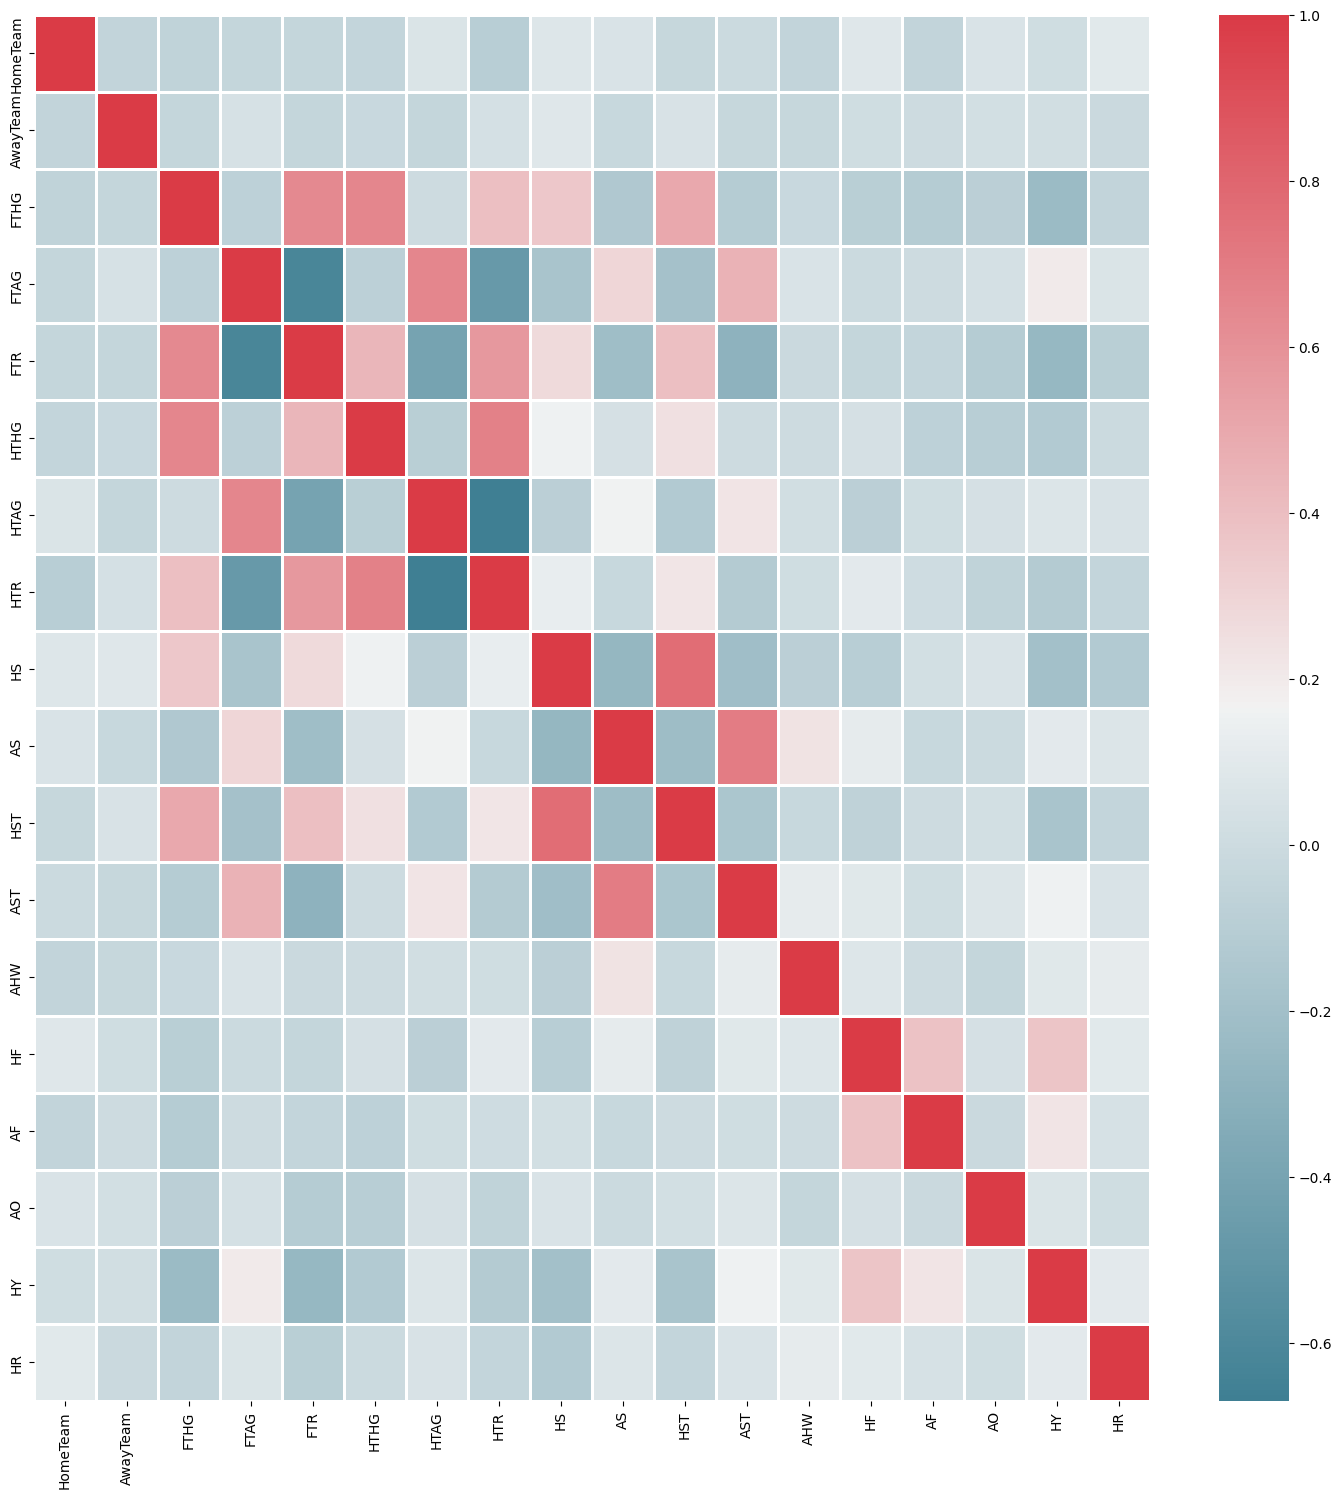

In [ ]:
import seaborn as sns
f,ax = plt.subplots(figsize = (18,18))
cmap = sns.diverging_palette(220,10,as_cmap = True)
heatmap = sns.heatmap(cor_mat, cmap = cmap, vmax = 1, linewidths = 1, ax =  ax)
plt.show()

In [ ]:
dataset.columns

Index(['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR',
       'HS', 'AS', 'HST', 'AST', 'AHW', 'HF', 'AF', 'AO', 'HY', 'HR'],
      dtype='object')

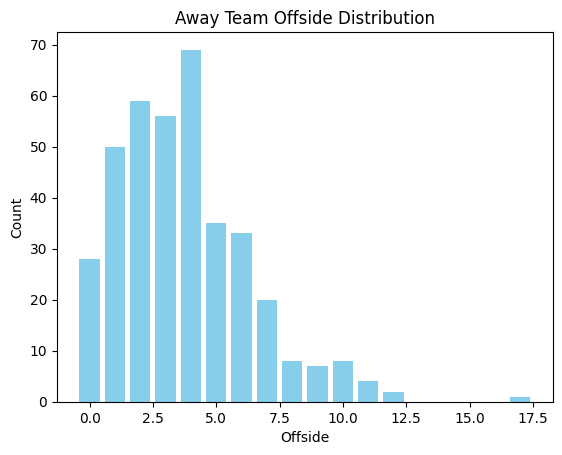

In [ ]:
data = dataset['AO'].value_counts()
plt.bar(data.index, data.values, color='skyblue')
plt.xlabel('Offside')
plt.ylabel('Count')
plt.title('Away Team Offside Distribution')
plt.show()

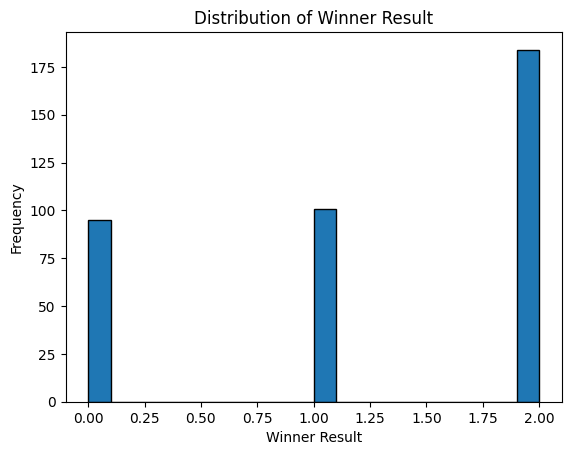

In [ ]:
plt.hist(dataset['FTR'], bins=20, edgecolor='k')
plt.xlabel('Winner Result')
plt.ylabel('Frequency')
plt.title('Distribution of Winner Result')
plt.show()